<a href="https://colab.research.google.com/github/Rizkyepk/Machine_Learning-Course/blob/main/week_4/Data_Visualizstion_Video_Games_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizky Eka Putra Kusnady

NIM : 1103204195

Dataset : https://www.kaggle.com/datasets/gregorut/videogamesales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML/vgsales.csv')

# Menampilkan lima baris pertama dari dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# menampilkan feature statistik
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


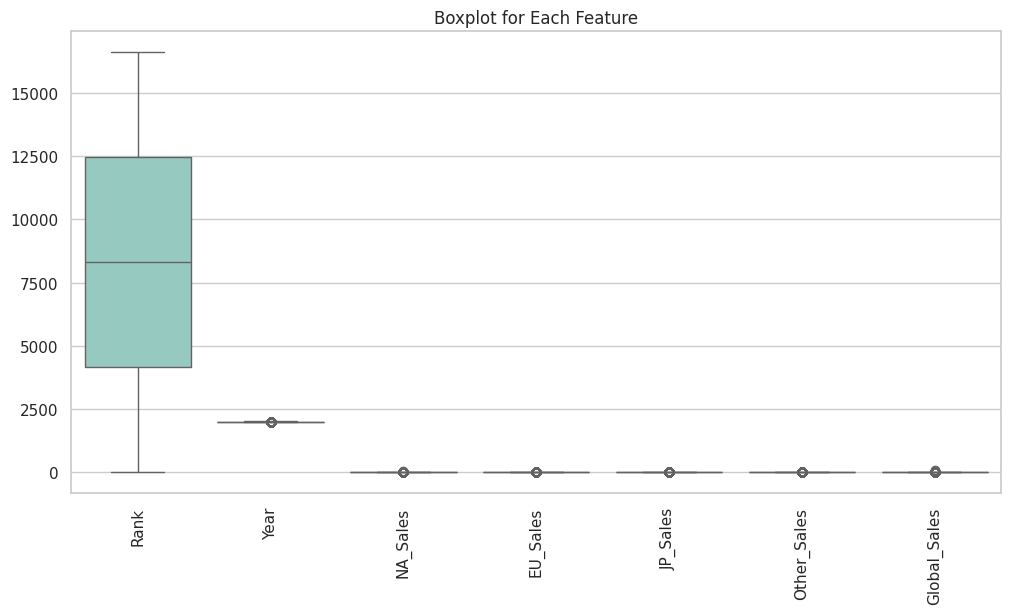

In [9]:
# Plot boxplot for each feature with different colors
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot for Each Feature')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x800 with 0 Axes>

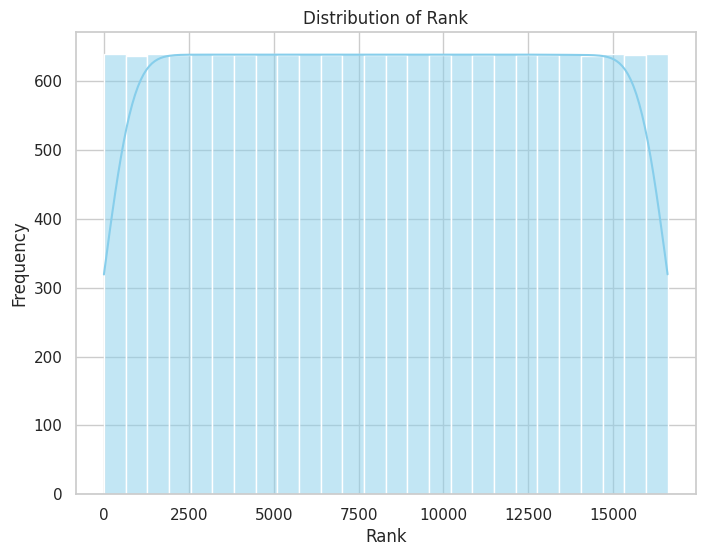

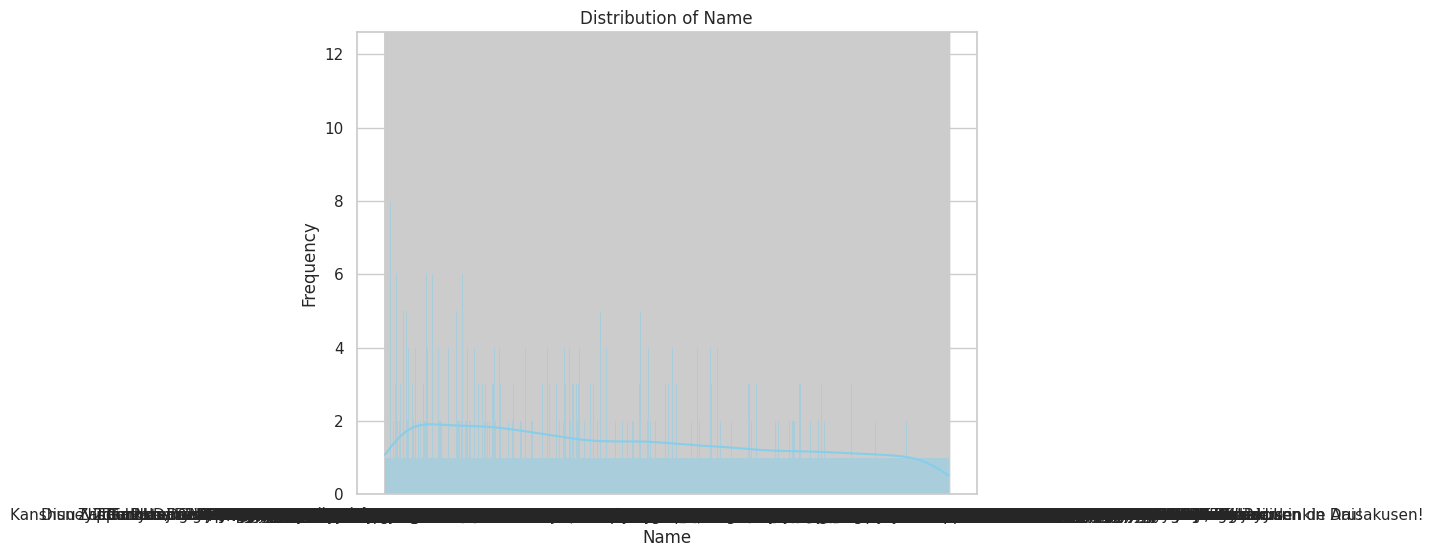

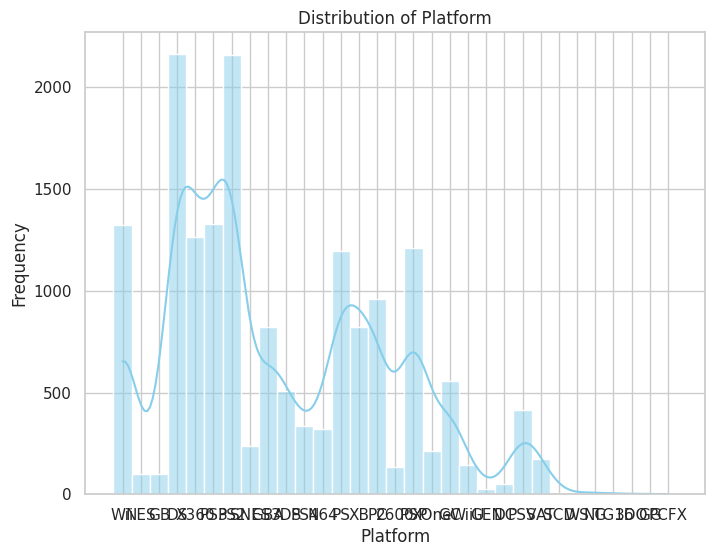

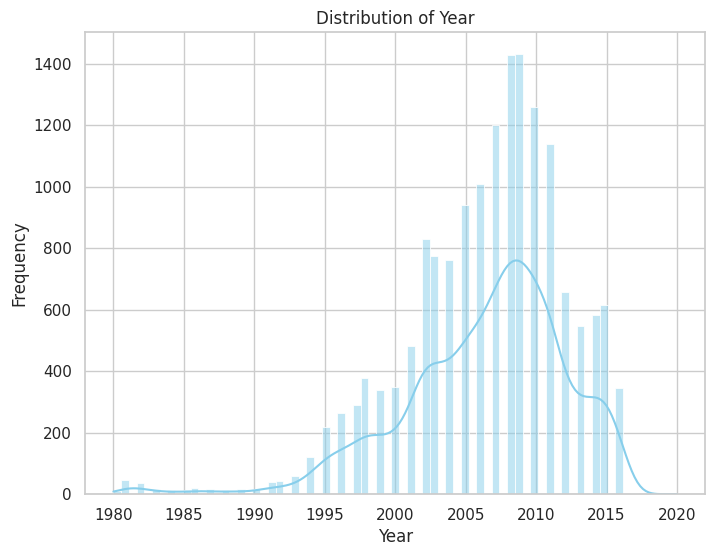

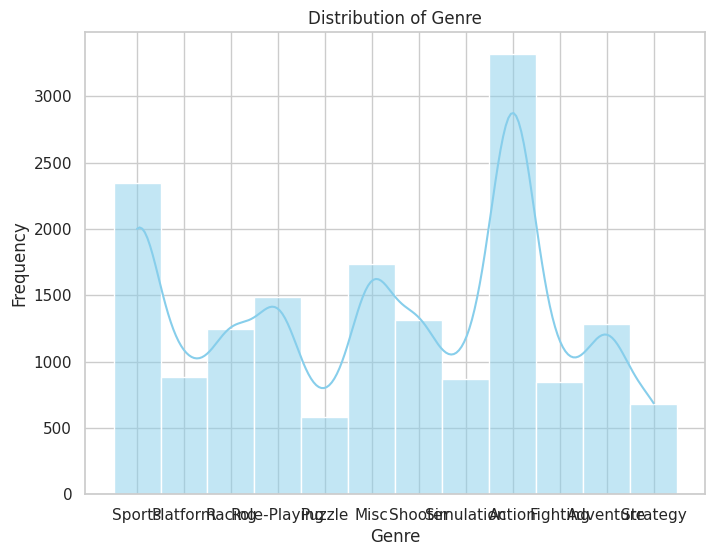

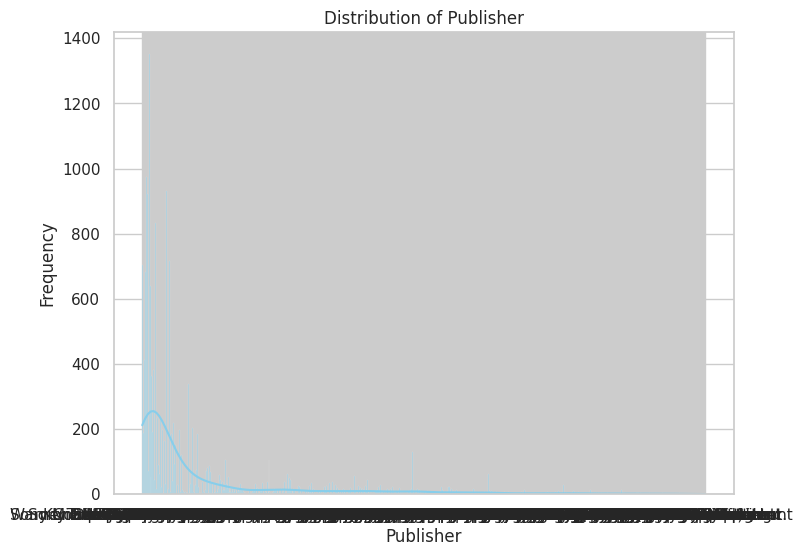

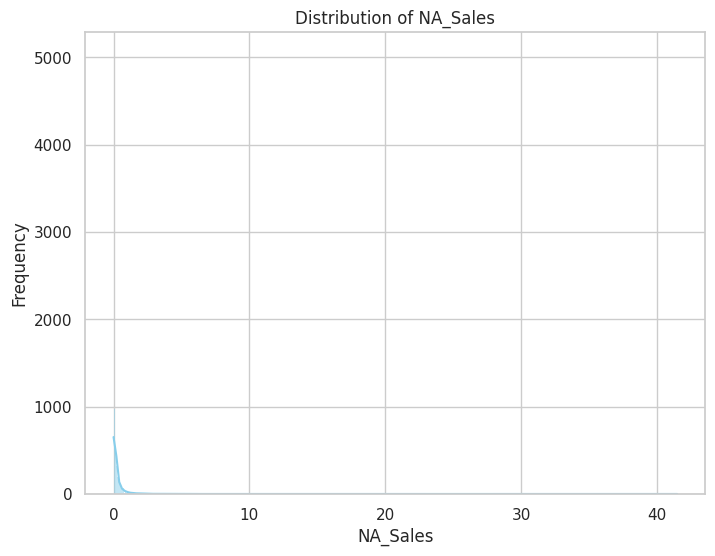

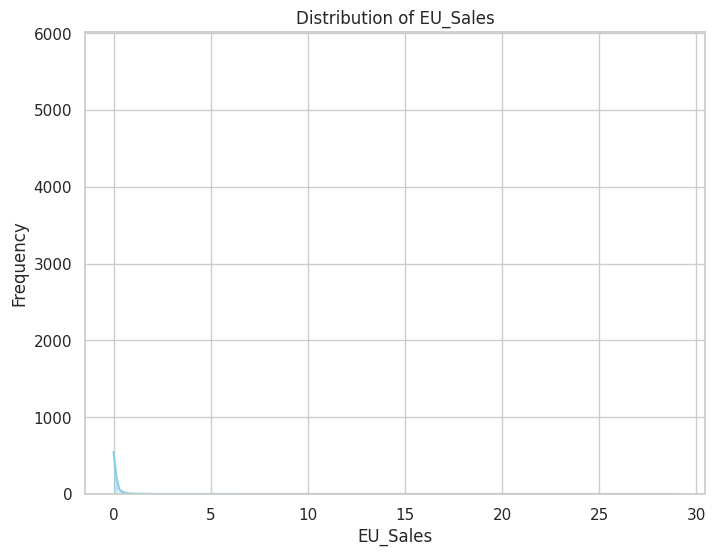

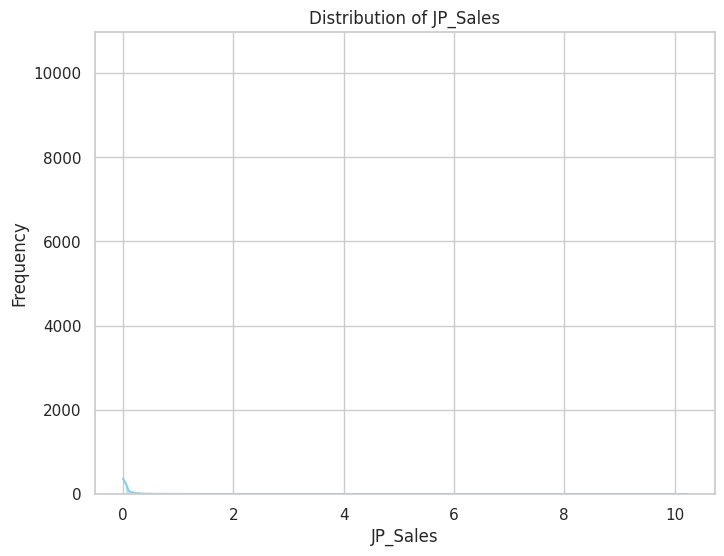

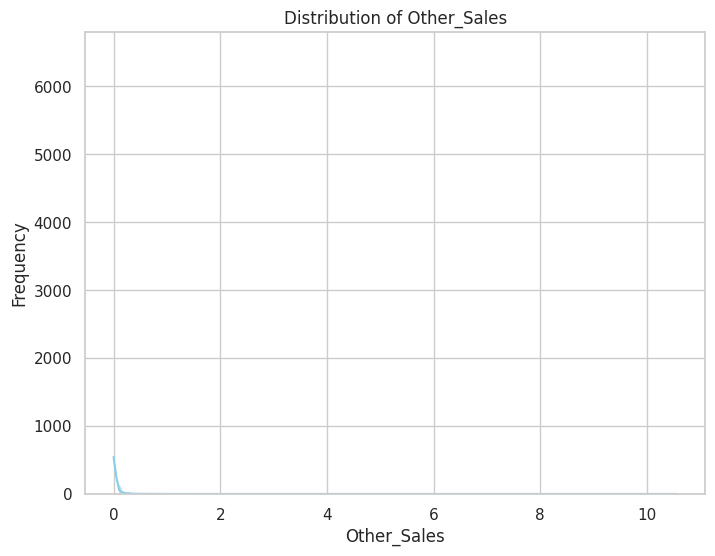

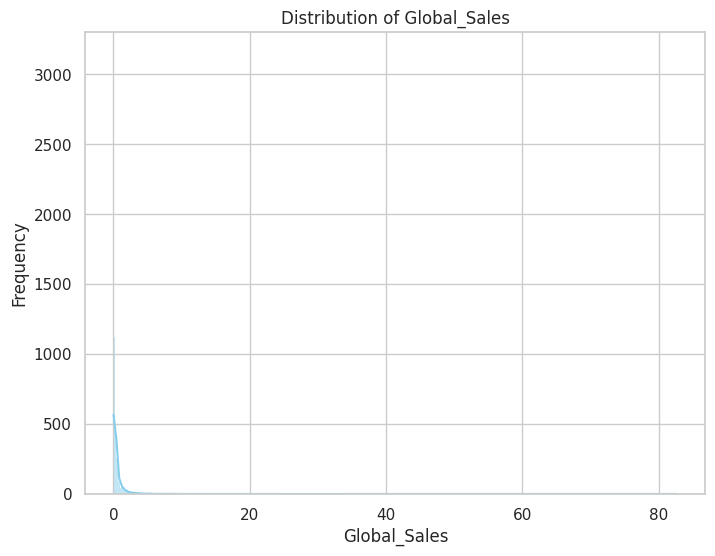

In [17]:
# Plot distribution for each feature
plt.figure(figsize=(12, 8))  # Ukuran keseluruhan gambar
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Ukuran plot distribusi
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

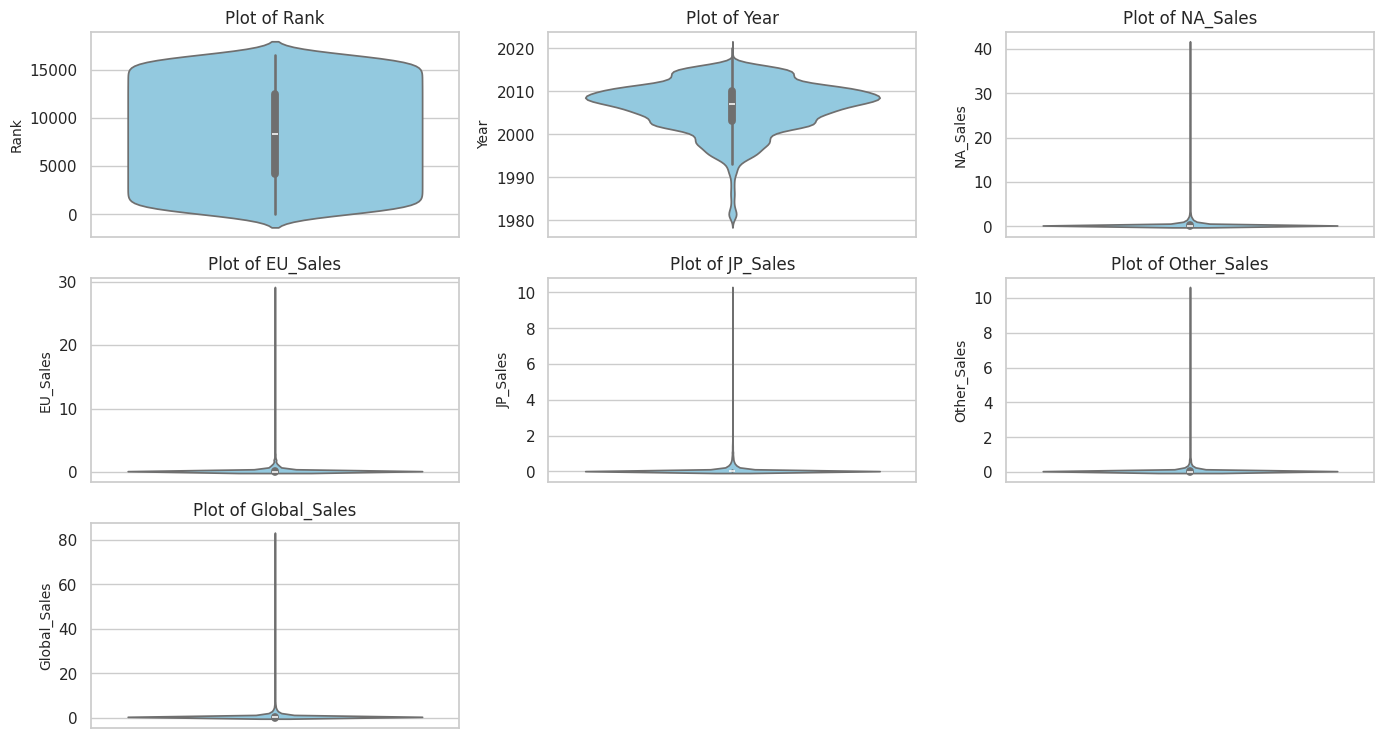

In [30]:
# Filter hanya fitur numerik
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Plot violin plot for each numeric feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features.columns):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(data=df[column], color='skyblue')
    plt.title(f'Plot of {column}', fontsize=12)
    plt.xlabel("")
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

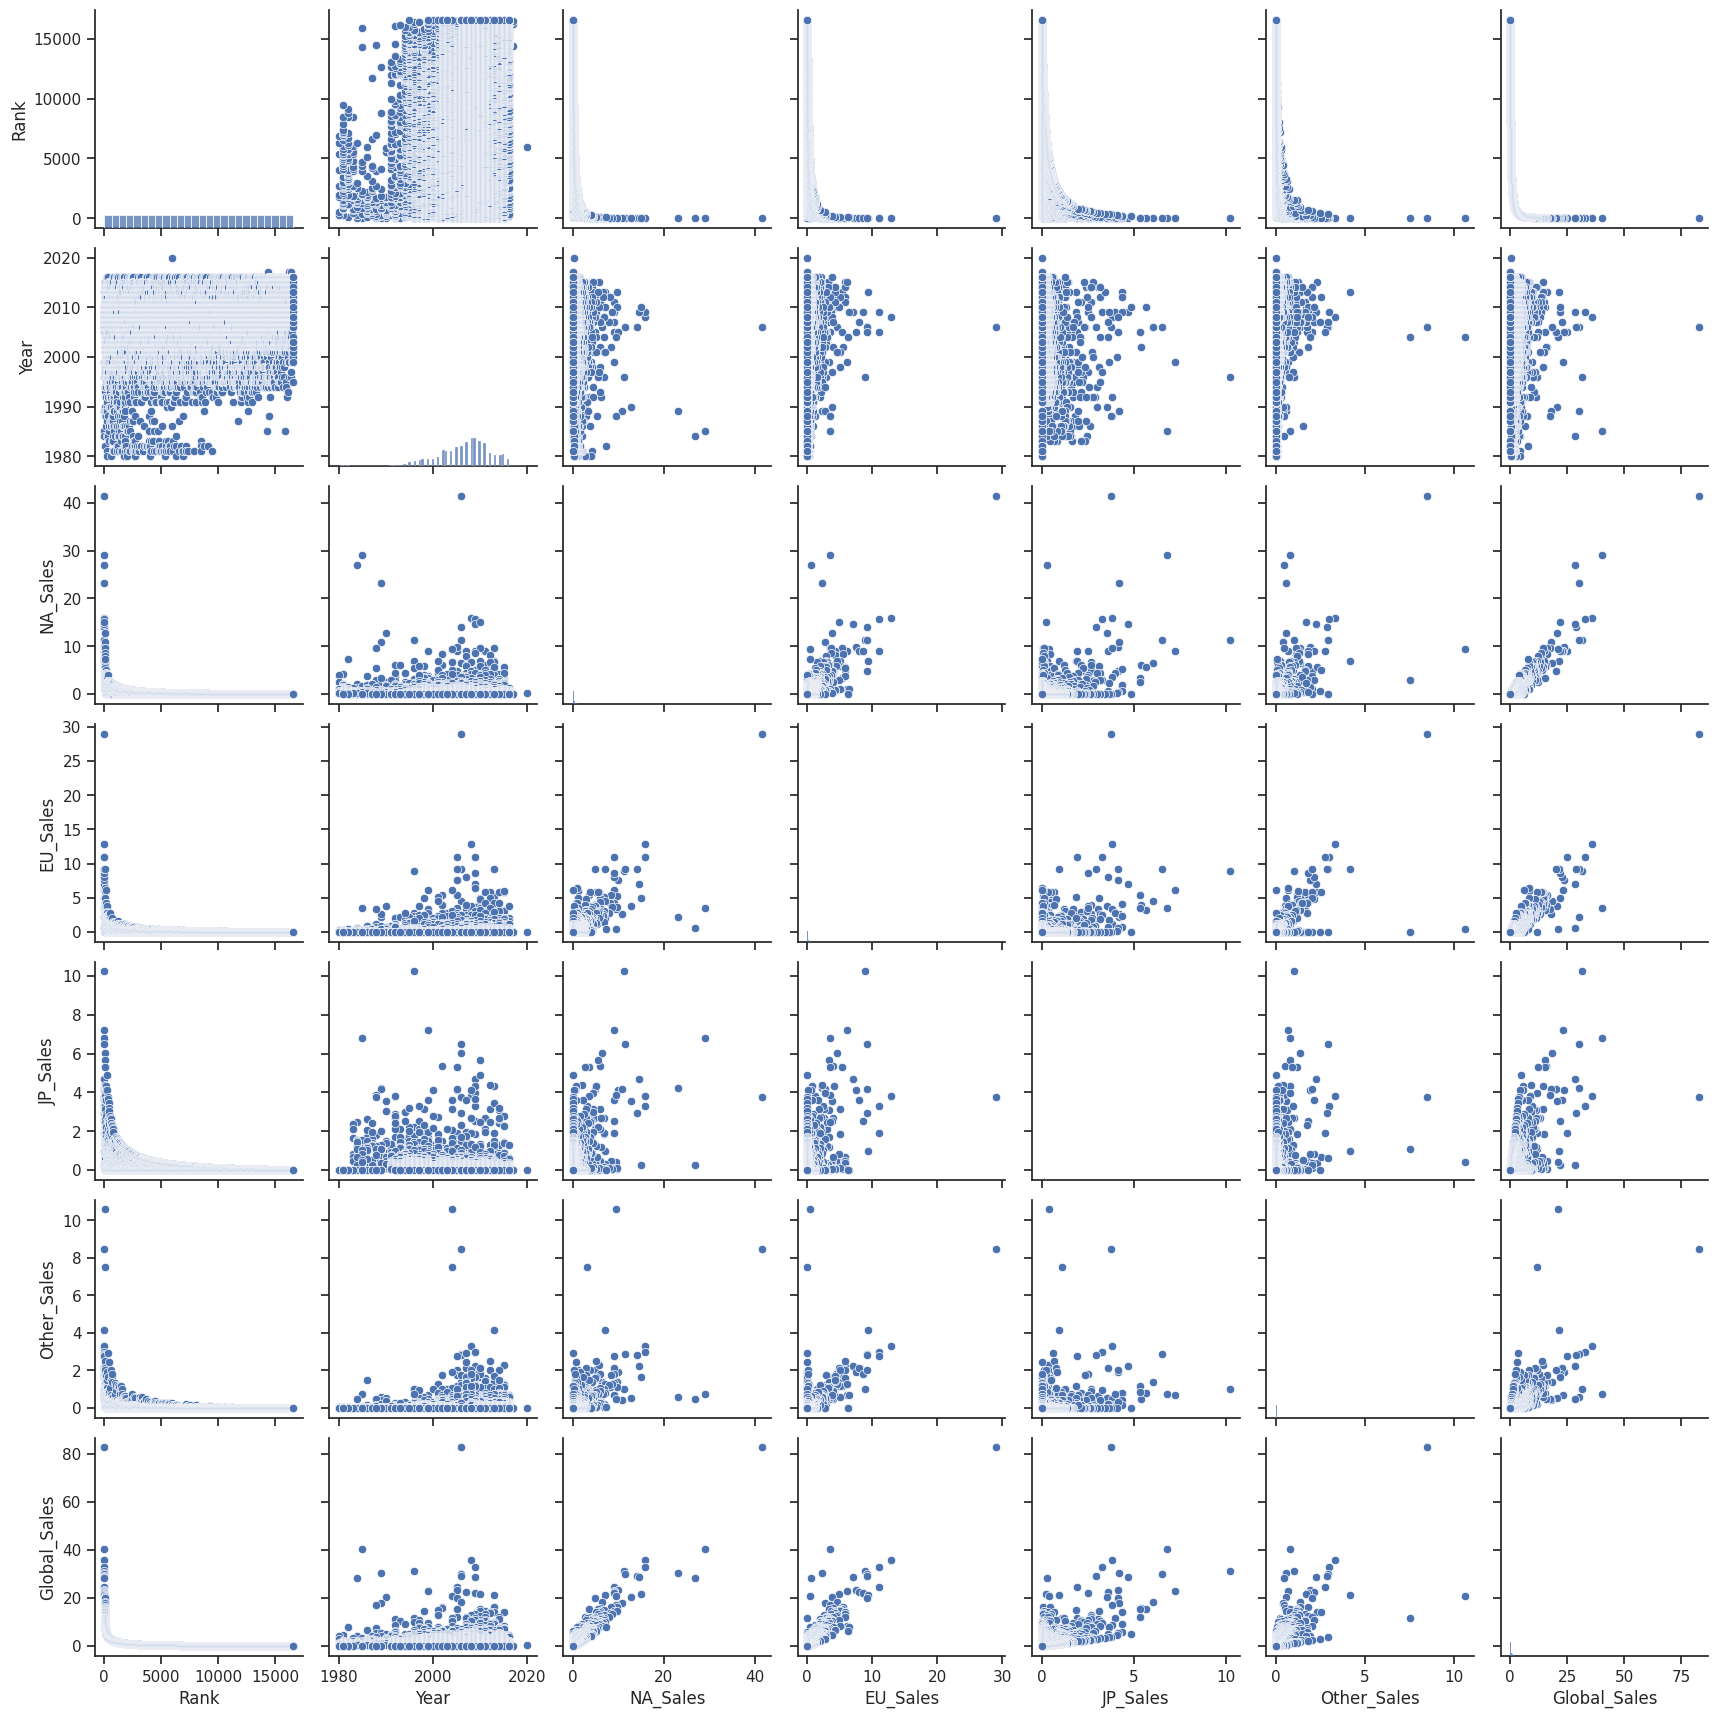

In [34]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat scatter plot untuk semua pasangan fitur numerik
sns.set(style="ticks")
sns.pairplot(df[numerical_columns])
plt.show()

<ipython-input-35-aaaba23f2448>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


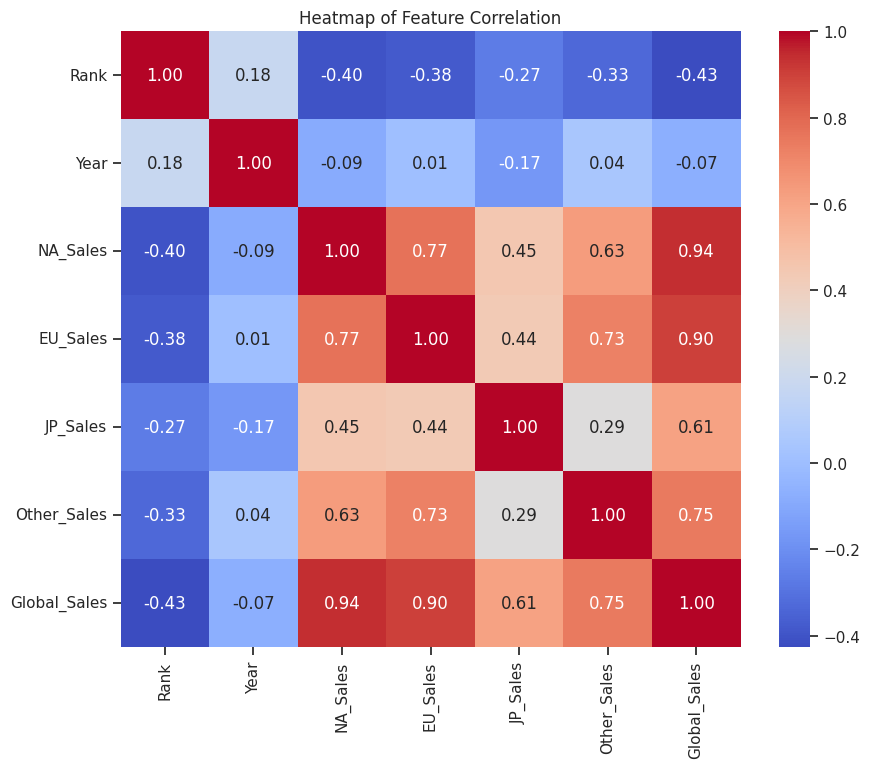

In [35]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlation')
plt.show()